<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-librairies" data-toc-modified-id="Chargement-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des librairies</a></span></li><li><span><a href="#Lecture-des-données" data-toc-modified-id="Lecture-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lecture des données</a></span></li><li><span><a href="#Nettoyage-du-jeu-de-données" data-toc-modified-id="Nettoyage-du-jeu-de-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nettoyage du jeu de données</a></span><ul class="toc-item"><li><span><a href="#Filtre-sur-les-produits-vendus-en-France" data-toc-modified-id="Filtre-sur-les-produits-vendus-en-France-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Filtre sur les produits vendus en France</a></span></li></ul></li><li><span><a href="#Prétraitement-des-données-:-Nettoyage-des-variables" data-toc-modified-id="Prétraitement-des-données-:-Nettoyage-des-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prétraitement des données : Nettoyage des variables</a></span><ul class="toc-item"><li><span><a href="#Supression-des-colonnes-moins-renseignées" data-toc-modified-id="Supression-des-colonnes-moins-renseignées-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Supression des colonnes moins renseignées</a></span></li><li><span><a href="#Supression-des-variables-redondantes" data-toc-modified-id="Supression-des-variables-redondantes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Supression des variables redondantes</a></span></li></ul></li><li><span><a href="#Suppression-des-valeurs-abérantes" data-toc-modified-id="Suppression-des-valeurs-abérantes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Suppression des valeurs abérantes</a></span></li><li><span><a href="#Imputation-des-valeurs-manquantes" data-toc-modified-id="Imputation-des-valeurs-manquantes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Imputation des valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#Méthode-Iterative-Imputer" data-toc-modified-id="Méthode-Iterative-Imputer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Méthode Iterative Imputer</a></span></li><li><span><a href="#Imputation-des-valeurs-manquantes-par-la-médiane-selon-le-nutriscore-grade" data-toc-modified-id="Imputation-des-valeurs-manquantes-par-la-médiane-selon-le-nutriscore-grade-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Imputation des valeurs manquantes par la médiane selon le nutriscore grade</a></span></li></ul></li></ul></div>

# Projet_3: Concevez une application au service de la santé publique

Le projet a pour objectif de trouver des idées innovantes d'applications en lien avec l'alimentation. les taches consisite à traiter le jeu de données Open Food Facts en identifiant des variables pertinentes pour leur idée d'application, nettoyant les données en mettant en évidence les valeurs manquantes et aberrantes, produisant des visualisations simples et compréhensibles, confirmant ou infirmant les hypothèses à l'aide d'une analyse multivariée, et justifiant leur idée d'application en fonction des données Open Food Facts.

Lien vers les consignes du projet sur openclassrooms : https://openclassrooms.com/fr/projects/628/assignment

Description du jeu de données : https://world.openfoodfacts.org/data/data-fields.txt

## Chargement des librairies

In [1]:
# Importation des modules nécessaires
from urllib import request  # permet de récupérer un fichier à partir d'une URL
import pandas as pd  # pour la manipulation des données sous forme de tableaux
import matplotlib.pyplot as plt  # pour la création de graphiques
import seaborn as sns  # pour la création de graphiques plus avancés
import numpy as np  # pour les opérations mathématiques sur les tableaux
import re  # pour les expressions régulières (pattern matching)
import IPython.display  # pour afficher des résultats directement dans Jupyter Notebook

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuration du style des graphiques
sns.set()

## Lecture des données

In [3]:
filepath = '/Users/admin/Desktop/formation_data_Scientist/projet_3/données/A/openfoodfacts.org.products.csv'

In [4]:
'''Le paramètre "sep" est utilisé pour spécifier le séparateur 
de champ utilisé dans le fichier CSV. Ici, le séparateur est "\t", 
ce qui signifie que le fichier est séparé par des tabulations. 
Le paramètre "low_memory" est utilisé pour spécifier si la lecture 
du fichier doit être effectuée en utilisant une quantité minimale de mémoire.'''
df = pd.read_csv(filepath,  sep = '\t', low_memory=False)

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def display_df_info(df):
    """
    Affiche les informations sur le DataFrame
    """
    # affichage du nombre total de valeurs manquantes dans le jeu de données
    total_nan_values = df.isnull().sum().sum()
    print(f"Le nombre total de valeurs manquantes dans le jeu de données est: {total_nan_values}")

    # affichage de la forme (shape) du DataFrame
    print("Shape of dataframe: ", df.shape)

    # affichage des informations sur les colonnes (types et nombre de valeurs non nulles)
    print("Column Information: ")
    print(df.info())

    # calcul du nombre total de valeurs manquantes dans le dataframe
    total_nan_values = df.isnull().sum().sum()
    print("Total number of NaN values in dataframe: ", total_nan_values)
display_df_info(df)

Le nombre total de valeurs manquantes dans le jeu de données est: 39608589
Shape of dataframe:  (320772, 162)
Column Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB
None
Total number of NaN values in dataframe:  39608589


## Nettoyage du jeu de données

### Filtre sur les produits vendus en France

Pour cette étape, nous avons décidé de nous concentrer sur les produits vendus en France, c'est pourquoi nous allons procéder à un filtrage des données pour ne conserver que les produits vendus en France ou dans des territoires associés. En appliquant la fonction filter_france_country, nous allons éliminer les lignes du DataFrame qui ne correspondent pas aux critères de vente en France ou dans les territoires associés, afin d'obtenir un nouveau DataFrame df_FR qui contient uniquement les données relatives aux produits vendus en France. Cette étape de filtrage nous permettra de nous focaliser sur les produits vendus en France pour les analyses et les visualisations ultérieures.

In [7]:
def count_products_by_country(df):
    # Extraction des produits ayant 'Fr' dans la colonne 'countries'
    fr_countries = df[df['countries'].str.contains('Fr', na=False)]
    
    # Compter le nombre de produits par pays
    count_products = fr_countries['countries'].value_counts()
    
    # Création du tableau
    table = pd.DataFrame({'Pays': count_products.index, 'Nombre de produits':count_products.values})
    
    # Affichage du tableau
    display(table)
count_products_by_country(df)


,Pays,Nombre de produits
0,France,77292
1,"France, Suisse",506
2,"Belgique,France",219
3,"France,Suisse",212
4,"France,UK",135
...,...,...
491,"Belgique,France,Allemagne,Italie,Pays-Bas,Espa...",1
492,"France,Bourgogne-Aube-Nogent sur Seine",1
493,"Suisse,France,Belgique",1
494,"France,Italia",1


In [8]:
def filter_france_country(df):
    # Liste des noms de pays qui contiennent "France"
    france_country_list = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 'Polynésie Française', 'Mayotte']
    
    # Filtrer les données pour ne garder que les pays de France
    df_FR = df[df['countries_fr'].isin(france_country_list)]
    
    # Afficher le nombre de produits restants après le filtrage
    print(f"Nombre de produits dans le jeu de données pour les pays de France: {len(df_FR)}")
    
    # Retourner les données filtrées
    return df_FR
df_FR = filter_france_country(df)

Nombre de produits dans le jeu de données pour les pays de France: 94675


In [9]:
df_FR.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Prétraitement des données : Nettoyage des variables

### Supression des colonnes moins renseignées

La fonction ci dessous calcule le pourcentage de valeurs manquantes pour chaque variable, puis filtre les variables 100% remplies et les autres. Elle crée ensuite deux DataFrames : un pour les variables 100% remplies, qui ont un pourcentage manquant de 0, et un autre pour les variables avec des valeurs manquantes.

In [10]:
def print_missing_data(df):
    missing_data = df.isna().sum() / len(df) * 100
    missing_data = missing_data.sort_values(ascending=False)
    is_full = missing_data == 0
    is_not_full = ~is_full
    full_variables = missing_data[is_full].index.tolist()
    non_full_variables = missing_data[is_not_full].index.tolist()
    full_data = pd.DataFrame({'Variable': full_variables, 'Pourcentage manquant': [0] * len(full_variables)})
    non_full_data = pd.DataFrame({'Variable': non_full_variables, 'Pourcentage manquant': missing_data[is_not_full].tolist()})
    print("Variables 100% remplies :\n", full_data)
    print("Variables avec des valeurs manquantes :\n", non_full_data)
print_missing_data(df_FR)

Variables 100% remplies :
                   Variable  Pourcentage manquant
0          last_modified_t                     0
1                  creator                     0
2             countries_fr                     0
3           countries_tags                     0
4                created_t                     0
5         created_datetime                     0
6                states_fr                     0
7   last_modified_datetime                     0
8                countries                     0
9              states_tags                     0
10                     url                     0
11                  states                     0
12                    code                     0
Variables avec des valeurs manquantes :
                 Variable  Pourcentage manquant
0    water-hardness_100g            100.000000
1      gondoic-acid_100g            100.000000
2     caprylic-acid_100g            100.000000
3      caproic-acid_100g            100.000000
4      buty

La fonction plot_missing_data(df) crée un graphique horizontal pour visualiser les variables avec des valeurs manquantes dans le DataFrame df, en affichant le pourcentage de valeurs manquantes pour chaque variable.

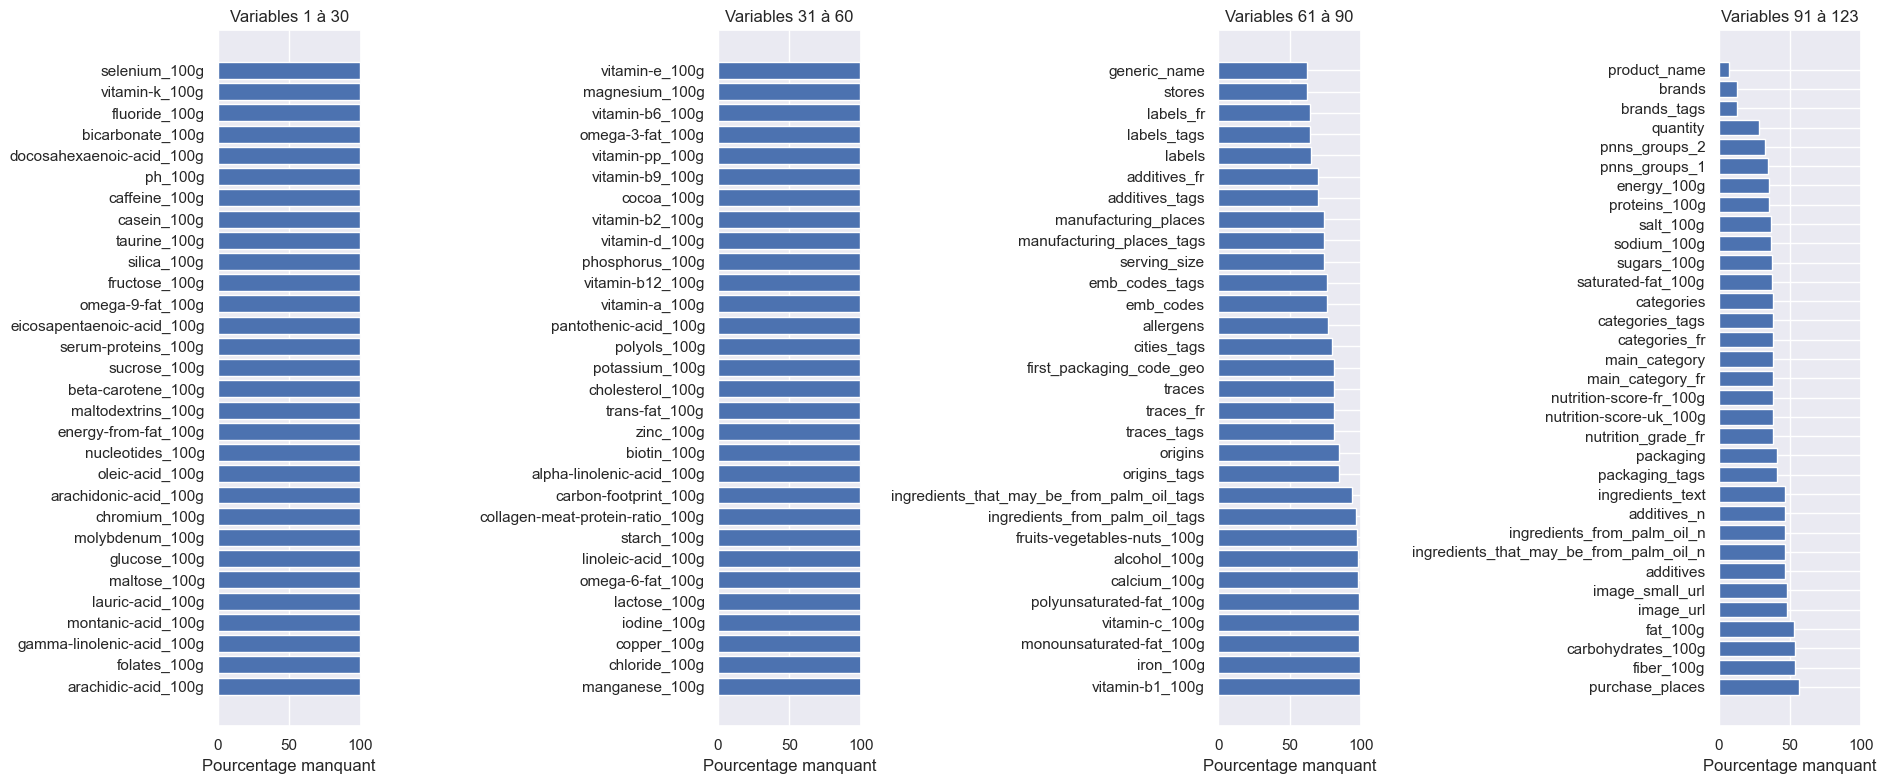

In [11]:
def plot_missing_data(df, num_cols=3):
    missing_data = df.isna().sum() / len(df) * 100
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    # filtrer les variables 100% remplies
    missing_data = missing_data[missing_data < 100]
    if missing_data.empty:
        print("Toutes les variables sont complètes")
    else:
        num_vars = len(missing_data)
        vars_per_col = num_vars // num_cols
        fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(19, 8))
        for i in range(num_cols):
            start_idx = i * vars_per_col
            end_idx = start_idx + vars_per_col
            if i == num_cols - 1:
                end_idx = num_vars
            data_subset = missing_data.iloc[start_idx:end_idx]
            axs[i].barh(y=data_subset.index, width=data_subset.values)
            axs[i].set_title(f"Variables {start_idx+1} à {end_idx}")
            axs[i].set_xlabel('Pourcentage manquant')
            axs[i].set_xlim([0, 100])
        plt.tight_layout()
        plt.show()
plot_missing_data(df_FR, num_cols=4)

In [12]:
def clean_nan(df):
    ''' Suppression des colonnes ayant 
    moins de valeurs que le taux de rétention.
    Renvoie en sortie la dataframe sans les colonnes non conservées'''

    non_nan_quantity = df.isna().sum() / len(df) * 100
    nb_NaN = df.shape[1]

    cols_to_remove = non_nan_quantity[non_nan_quantity > 70].index.tolist()
    df = df[non_nan_quantity[non_nan_quantity <= 70].index.tolist()]

    nb_NaN -= df.shape[1]
    print(f"Nombre de colonnes supprimées : {nb_NaN}")
    print(f"Colonnes supprimées : {', '.join(cols_to_remove)}" if cols_to_remove else "Aucune colonne supprimée")

    return df
df_FR = clean_nan(df_FR)

Nombre de colonnes supprimées : 109
Colonnes supprimées : origins, origins_tags, manufacturing_places, manufacturing_places_tags, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, energy-from-fat_100g, butyric-acid_100g, caproic-acid_100g, caprylic-acid_100g, capric-acid_100g, lauric-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, arachidic-acid_100g, behenic-acid_100g, lignoceric-acid_100g, cerotic-acid_100g, montanic-acid_100g, melissic-acid_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, alpha-linolenic-acid_100g, eicosapentaenoic-acid_100g, docosahexaenoic-acid_100g, omega-6-fat_100g, linoleic-acid_100g, arachidonic-acid_100g, gamma-linolenic-acid_100g, dihomo-gamma

### Supression des variables redondantes

In [13]:
def print_columns_horizontally(df):
    columns = df.columns.to_list()
    for col in columns:
        print(col, end=' | ')
    print()
print_columns_horizontally(df_FR)

code | url | creator | created_t | created_datetime | last_modified_t | last_modified_datetime | product_name | generic_name | quantity | packaging | packaging_tags | brands | brands_tags | categories | categories_tags | categories_fr | labels | labels_tags | labels_fr | purchase_places | stores | countries | countries_tags | countries_fr | ingredients_text | additives_n | additives | additives_tags | additives_fr | ingredients_from_palm_oil_n | ingredients_that_may_be_from_palm_oil_n | nutrition_grade_fr | pnns_groups_1 | pnns_groups_2 | states | states_tags | states_fr | main_category | main_category_fr | image_url | image_small_url | energy_100g | fat_100g | saturated-fat_100g | carbohydrates_100g | sugars_100g | fiber_100g | proteins_100g | salt_100g | sodium_100g | nutrition-score-fr_100g | nutrition-score-uk_100g | 


In [14]:
df_FR[['countries_tags', 'countries', 'countries_fr' ]].head(5)

,countries_tags,countries,countries_fr
0,en:france,en:FR,France
46,en:france,France,France
48,en:france,en:FR,France
136,en:france,France,France
182,en:france,France,France


Il est possible d'observer des variables redondantes dans le jeu de données, par exemple avec les variables "states", "states_tags" et "states_fr" qui sont nommées différemment mais fournissent les mêmes informations.

In [15]:
df_FR[["sodium_100g", "salt_100g"]].corr()

,sodium_100g,salt_100g
sodium_100g,1.0,1.0
salt_100g,1.0,1.0


In [16]:
def remove_columns(df) :
    columns_to_delete = ['countries', 'brands', 'additives', 'states', 
                         'states_tags', 'nutrition-score-uk_100g', 
                         'last_modified_t', 'created_t', 'salt_100g']
    for column in columns_to_delete:
        if column in df.columns:
            dataframe = df.drop(column, axis = 1)
            print('Colonne supprimée :', column)
        else:
            print('Colonne non présente :', column)
    print('\nNombre de colonnes restantes :', len(df.columns))
    print('Nombre total de colonnes :', len(columns_to_delete))
    return df
df_FR_clean = remove_columns(df_FR)

Colonne supprimée : countries
Colonne supprimée : brands
Colonne supprimée : additives
Colonne supprimée : states
Colonne supprimée : states_tags
Colonne supprimée : nutrition-score-uk_100g
Colonne supprimée : last_modified_t
Colonne supprimée : created_t
Colonne supprimée : salt_100g

Nombre de colonnes restantes : 53
Nombre total de colonnes : 9


## Suppression des valeurs abérantes 

In [18]:
ind = df_FR_clean[(df_FR_clean["proteins_100g"] > 100)
                                  | ((df_FR_clean["sugars_100g"] > 100)| (df_FR_clean["sugars_100g"] < 0))
                                  | ((df_FR_clean["fat_100g"] > 100) | (df_FR_clean["fat_100g"] < 0))
                                  | ((df_FR_clean["proteins_100g"]> 100) | (df_FR_clean["proteins_100g"]< 0))
                                  | ((df_FR_clean["fiber_100g"]> 100) | (df_FR_clean["fiber_100g"]< 0))
                                  | ((df_FR_clean["saturated-fat_100g"] > 100) | (df_FR_clean["saturated-fat_100g"] < 0))
                                  | ((df_FR_clean["carbohydrates_100g"] > 100)  | (df_FR_clean["carbohydrates_100g"] < 0))
                                  | ((df_FR_clean["sodium_100g"] > 100) | (df_FR_clean["sodium_100g"] < 0))
                                  | ((df_FR_clean["energy_100g"] > 3700) | (df_FR_clean["energy_100g"] < 0))] 
#df_FR_clean = df_FR_clean.drop(axis=0, index=ind.index)
 

In [19]:
ind.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56561,0043647390011,http://world-fr.openfoodfacts.org/produit/0043...,kiliweb,1489177885,2017-03-10T20:31:25Z,1489177885,2017-03-10T20:31:25Z,Tawny' Orange,NaN,NaN,...,NaN,0.0,NaN,65.0,0.0,0.0,0.0,0.0,20.0,20.0
68125,0068100083859,http://world-fr.openfoodfacts.org/produit/0068...,kiliweb,1488332648,2017-03-01T01:44:08Z,1488332648,2017-03-01T01:44:08Z,Beurre D'arachide (sans Sel Ni Sucre),NaN,NaN,...,NaN,10.5,NaN,10.0,10.0,30.0,0.0,0.0,17.0,17.0
115370,0411015621416,http://world-fr.openfoodfacts.org/produit/0411...,openfoodfacts-contributors,1426942955,2015-03-21T13:02:35Z,1448291297,2015-11-23T15:08:17Z,extra virgin cocos,NaN,"100% raw, bio, 0% gluten n",...,100.0,92.1,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0
155609,0838619000254,http://world-fr.openfoodfacts.org/produit/0838...,openfoodfacts-contributors,1485018633,2017-01-21T17:10:33Z,1487082434,2017-02-14T14:27:14Z,Beurre d'érable,NaN,245 g,...,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN,NaN
161426,0853807005163,http://world-fr.openfoodfacts.org/produit/0853...,kiliweb,1488461958,2017-03-02T13:39:18Z,1488461959,2017-03-02T13:39:19Z,Huile d'avocat,NaN,NaN,...,NaN,15.0,NaN,0.0,0.0,0.0,0.0,0.0,20.0,20.0


Après une analyse du dataset, nous avons remarqué la présence de valeurs aberrantes dans certaines colonnes telles que "proteins_100g", "sugars_100g", "fat_100g", "fiber_100g", "saturated-fat_100g", "carbohydrates_100g", "sodium_100g" et "energy_100g". Les valeurs aberrantes détectées dans ces colonnes seraient celles qui dépassent les limites raisonnables, à savoir celles qui sont supérieures à 100 ou inférieures à 0. En outre, pour la colonne "energy_100g", une valeur supérieure à 3700 kilojoules pour une portion de 100 grammes d'un aliment peut être considérée comme anormalement élevée 

In [20]:
df_FR_clean = df_FR_clean.drop(axis=0, index=ind.index)

2.2.2 supression les lignes non rensignées pour les variables quantitatives

In [22]:
def supp_cases_nulles(dataframe):
    col_with_nan = dataframe[dataframe["energy_100g"].isna()
                            & dataframe["proteins_100g"].isna()
                            & dataframe["sugars_100g"].isna()
                            & dataframe["fat_100g"].isna()
                            & dataframe["fiber_100g"].isna() 
                            & dataframe["saturated-fat_100g"].isna()
                            & dataframe["carbohydrates_100g"].isna()
                            & dataframe["sodium_100g"].isna()] 
    dataframe= dataframe.drop(axis=0, index=col_with_nan.index)
    print('le nombre de lignes suprimés est:', col_with_nan.shape[0])
    print('le jeu de données est des outelires est le suivant:')
    display(col_with_nan)
    return dataframe
df_FR_clean = supp_cases_nulles(df_FR_clean) 

le nombre de lignes suprimés est: 32611
le jeu de données est des outelires est le suivant:


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320760,99044169,http://world-fr.openfoodfacts.org/produit/9904...,date-limite-app,1421873458,2015-01-21T20:50:58Z,1460898286,2016-04-17T13:04:46Z,Poireaux,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def check_unknown(data):
    """
    Check if "unknown" value is present for some observations for each variable in the dataframe.
    
    Args:
        data(dataframe) : A dataframe to be checked
    Returns:
        Number of observations with an "unknow" value for each stream
    """
    
    unknown_dict = {}
    
    for col in data.columns:
        unknown_dict[col] = data[data[col] =="unknown"].shape[0]
    
    return pd.DataFrame.from_dict(data=unknown_dict, orient ="index", columns = ["Nombre d'observations unknown"]).sort_values(by="Nombre d'observations unknown", ascending=False)

check_unknown(df_FR_clean) 

,Nombre d'observations unknown
pnns_groups_1,7454
pnns_groups_2,7454
code,0
additives,0
additives_fr,0
ingredients_from_palm_oil_n,0
ingredients_that_may_be_from_palm_oil_n,0
nutrition_grade_fr,0
states,0
states_tags,0


## Imputation des valeurs manquantes 

###  Méthode Iterative Imputer

Le principe de fonctionnement d'IterativeImputer est le suivant :

Tout d'abord, l'imputeur divise l'ensemble de données en deux parties : les valeurs manquantes et les valeurs non manquantes.
Il utilise ensuite les valeurs non manquantes pour entraîner un modèle (par exemple, une régression linéaire ou un réseau de neurones) qui peut prédire les valeurs manquantes à partir des autres valeurs.
L'imputeur utilise ensuite ce modèle pour prédire les valeurs manquantes dans l'ensemble de données. Les valeurs manquantes sont remplacées par les prédictions du modèle.
Ce processus est répété plusieurs fois jusqu'à ce que les valeurs imputées convergent, c'est-à-dire que les prédictions ne changent pas beaucoup d'une itération à l'autre. L'imputeur arrête de remplir les valeurs manquantes une fois qu'il a atteint un critère d'arrêt spécifié, tel que le nombre maximal d'itérations ou une tolérance pour la différence entre les prédictions d'une itération à l'autre.

In [24]:
df_imput_it_sklearn = df_FR_clean.copy()
df_imput_it_sklearn = df_imput_it_sklearn.select_dtypes(['int32','float64'])
def imput_iter_skealearn(df):
    imp = IterativeImputer(max_iter=10, verbose=2 , tol = 1e-8 )
    imp.fit_transform(df_imput_it_sklearn)
    data_imputed = pd.DataFrame(imp.fit_transform(df_imput_it_sklearn), columns=df_imput_it_sklearn.columns)
    print('Le nombre pourcentage de NaN dans les variables quantitatives est:', data_imputed.isna().sum())
    display(data_imputed)
    return data_imputed
data_imputed = imput_iter_skealearn(df_imput_it_sklearn)

[IterativeImputer] Completing matrix with shape (61802, 14)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.61
[IterativeImputer] Change: 2348.9860842979297, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.18
[IterativeImputer] Change: 634.6605667388517, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.81
[IterativeImputer] Change: 94.84873526957149, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.38
[IterativeImputer] Change: 76.65726699694827, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 5/10, elapsed time 2.98
[IterativeImputer] Change: 64.69927001557691, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 6/10, elapsed time 3.58
[IterativeImputer] Change: 53.73615617934102, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 7/10, elapsed time 4.17
[IterativeImputer] Change: 44.09

/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 1/10, elapsed time 0.64
[IterativeImputer] Change: 2348.9860842979297, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.20
[IterativeImputer] Change: 634.6605667388517, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.76
[IterativeImputer] Change: 94.84873526957149, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.33
[IterativeImputer] Change: 76.65726699694827, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 5/10, elapsed time 2.97
[IterativeImputer] Change: 64.69927001557691, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 6/10, elapsed time 3.58
[IterativeImputer] Change: 53.73615617934102, scaled tolerance: 3.7e-05 
[IterativeImputer] Ending imputation round 7/10, elapsed time 4.35
[IterativeImputer] Change: 44.091691896555965, scaled tolerance: 3.7e-05 
[IterativeImputer]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2.497316,0.151949,0.127080,1753.0,5.802156,0.80,92.576303,87.70,0.900000,0.60,0.0100,0.003937,14.0,14.0
1,2.049790,0.152339,0.178788,2406.0,23.847548,2.90,79.290571,50.30,3.900000,9.50,0.0030,0.001181,14.0,14.0
2,2.000000,0.000000,0.000000,177.0,0.000000,0.00,10.400000,10.40,0.000000,0.00,0.0254,0.010000,13.0,2.0
3,2.728523,0.129803,0.251918,1079.0,21.107155,11.00,8.965328,1.00,1.400000,7.50,0.8000,0.314961,15.0,15.0
4,3.000000,0.000000,0.000000,177.0,0.000000,0.00,10.400000,10.40,0.007789,0.00,0.1000,0.039370,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61797,2.635625,0.115849,0.213338,1084.0,19.402024,12.00,13.463346,10.50,0.000000,8.70,0.2900,0.114173,16.0,16.0
61798,1.421447,0.066685,0.070181,4.0,-10.120236,1.00,6.047538,1.00,10.000000,10.00,10.0000,3.937008,0.0,0.0
61799,0.839437,0.068164,0.184422,1643.0,2.800000,0.60,74.800000,2.60,5.900000,13.00,0.6800,0.267717,-4.0,-4.0
61800,-0.091000,0.057653,0.060847,2406.0,26.633147,3.73,55.676089,3.89,12.200000,21.22,0.1000,0.039370,0.0,0.0


### Imputation des valeurs manquantes par la médiane selon le nutriscore grade

La médiane est une mesure de tendance centrale qui représente la valeur qui divise la distribution des données en deux parties égales. Autrement dit, elle est la valeur qui se situe au milieu de la distribution, lorsque les données sont triées par ordre croissant ou décroissant.

Pour calculer la médiane d'un ensemble de données numériques, on commence par trier les valeurs dans l'ordre croissant ou décroissant. Si l'ensemble de données contient un nombre impair de valeurs, la médiane est la valeur centrale. Si l'ensemble de données contient un nombre pair de valeurs, la médiane est la moyenne des deux valeurs centrales.

La médiane est souvent utilisée comme alternative à la moyenne pour résumer la tendance centrale d'un ensemble de données, car elle est moins sensible aux valeurs extrêmes (outliers) que la moyenne. Cela peut être utile lorsque les données sont susceptibles de contenir des valeurs aberrantes qui pourraient fausser la moyenne

In [25]:
def imput_median(df):
    for cols in df.columns:
        if df[cols].dtypes == "float64":
            df[cols].fillna(df.groupby('nutrition_grade_fr')[cols].transform('median'), inplace = True)
    return df

In [26]:
df_clean_median = df_FR_clean.copy()
df_clean_median = df_clean_median[df_clean_median['nutrition_grade_fr'].isna() == False]
df_clean_median.reset_index(inplace=True, drop=True)


In [27]:
imput_median(df_clean_median)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000010187319,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1487325954,2017-02-17T10:05:54Z,1487325954,2017-02-17T10:05:54Z,Mini Confettis,NaN,NaN,...,16.0,0.80,22.0,87.70,0.900,0.60,0.0100,0.003937,14.0,14.0
1,0000010207260,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1490203031,2017-03-22T17:17:11Z,1490203757,2017-03-22T17:29:17Z,Praliné Amande Et Noisette,NaN,NaN,...,16.0,2.90,22.0,50.30,3.900,9.50,0.0030,0.001181,14.0,14.0
2,0000040608754,http://world-fr.openfoodfacts.org/produit/0000...,andre,1345024108,2012-08-15T09:48:28Z,1439141731,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,15 cl,...,0.0,0.00,10.4,10.40,0.000,0.00,0.0254,0.010000,13.0,2.0
3,0000069161025,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1490212776,2017-03-22T19:59:36Z,1490212776,2017-03-22T19:59:36Z,Tarte Poireaux Et Lardons,NaN,NaN,...,16.0,11.00,22.0,1.00,1.400,7.50,0.8000,0.314961,15.0,15.0
4,0000087177756,http://world-fr.openfoodfacts.org/produit/0000...,tacite,1433586486,2015-06-06T10:28:06Z,1433589206,2015-06-06T11:13:26Z,7Up,Boisson gazeuse aux extraits naturels de citro...,33 cl,...,0.0,0.00,10.4,10.40,0.303,0.00,0.1000,0.039370,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58205,9782211109758,http://world-fr.openfoodfacts.org/produit/9782...,kiliweb,1489003558,2017-03-08T20:05:58Z,1489003558,2017-03-08T20:05:58Z,Verrine Cheescake Myrtille,NaN,NaN,...,16.0,12.00,22.0,10.50,0.000,8.70,0.2900,0.114173,16.0,16.0
58206,9782401029101,http://world-fr.openfoodfacts.org/produit/9782...,kiliweb,1491508021,2017-04-06T19:47:01Z,1491508021,2017-04-06T19:47:01Z,Fiche Brevet,NaN,NaN,...,2.9,1.00,10.9,1.00,10.000,10.00,10.0000,3.937008,0.0,0.0
58207,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,drmalabar,1437817626,2015-07-25T09:47:06Z,1442237848,2015-09-14T13:37:28Z,Tartines craquantes bio au sarrasin,NaN,NaN,...,2.8,0.60,74.8,2.60,5.900,13.00,0.6800,0.267717,-4.0,-4.0
58208,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,kiliweb,1491079938,2017-04-01T20:52:18Z,1491079939,2017-04-01T20:52:19Z,Amandes,NaN,NaN,...,2.9,3.73,10.9,3.89,12.200,21.22,0.1000,0.039370,0.0,0.0


In [29]:
numeric_cols = df_clean_median.select_dtypes(include=['float', 'int']).columns
print(df_clean_median[numeric_cols].isna().sum())

additives_n                                0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
energy_100g                                0
fat_100g                                   0
saturated-fat_100g                         0
carbohydrates_100g                         0
sugars_100g                                0
fiber_100g                                 0
proteins_100g                              0
salt_100g                                  0
sodium_100g                                0
nutrition-score-fr_100g                    0
nutrition-score-uk_100g                    0
dtype: int64


,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(320772, 162)",76.221573
1,données nettoyées,"(58210, 53)",16.477944


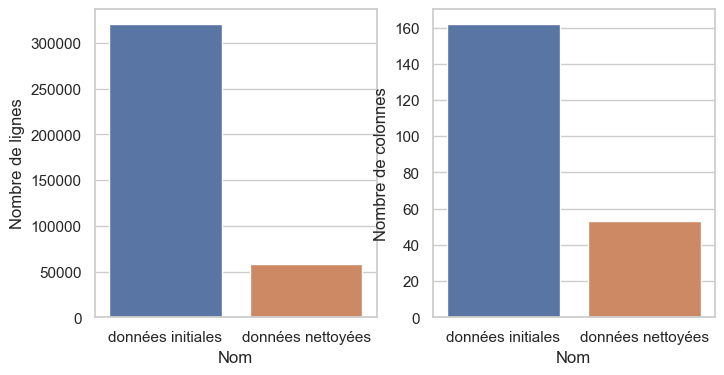

In [54]:
def plot_taille_jeux(df, df_clean_median):
    """
    Cette fonction permet de visualiser les dimensions de deux jeux de données : 
    le jeu de données original et le jeu de données nettoyé.
    
    Arguments:
    ----------
    - df : pandas dataframe
        Le jeu de données original non nettoyé.
    - df_clean_median : pandas dataframe
        Le jeu de données nettoyé par l'imputation des valeurs manquantes avec la médiane.
    
    Returns:
    --------
    Cette fonction ne retourne rien. Elle affiche deux graphiques qui représentent respectivement :
    - le nombre de lignes pour chaque jeu de données (original et nettoyé) ;
    - le nombre de colonnes pour chaque jeu de données (original et nettoyé).
    """
    # Calcul des dimensions (nombre de lignes et de colonnes) et du pourcentage de valeurs manquantes pour chaque jeu de données
    taille_jeux = pd.DataFrame({
        'Nom': ['données initiales', 'données nettoyées'],
        'Dimensions': [df.shape, df_clean_median.shape],
        'Proportion de NaN (en %)': [df.isna().sum().sum() / df.shape[0] / df.shape[1] * 100,
                                     df_clean_median.isna().sum().sum() / df_clean_median.shape[0] / df_clean_median.shape[1] * 100]
    })
    
    # Affichage du tableau des dimensions
    display(taille_jeux)
    
    # Ajout des colonnes de nombre de lignes et de nombre de colonnes au dataframe
    taille_jeux['Nombre de lignes'] = taille_jeux['Dimensions'].apply(lambda x: x[0])
    taille_jeux['Nombre de colonnes'] = taille_jeux['Dimensions'].apply(lambda x: x[1])
    
    # Affichage des deux graphiques représentant respectivement le nombre de lignes et le nombre de colonnes pour chaque jeu de données
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    sns.barplot(x='Nom', y='Nombre de lignes', data=taille_jeux, ax=axes[0])
    sns.barplot(x='Nom', y='Nombre de colonnes', data=taille_jeux, ax=axes[1])
    plt.show()
plot_taille_jeux(df, df_clean_median)



In [73]:
df_clean_median.to_csv('/Users/admin/Desktop/formation_data_Scientist/projet_3/données/A/cleaned_data1.csv', index=False)